In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# load the dataset
house = pd.read_csv('datasheet/House Price Prediction Dataset.csv')
house.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# EDA

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [6]:
house.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [13]:
house.drop(columns=['Id'], inplace=True)

<Axes: xlabel='Area'>

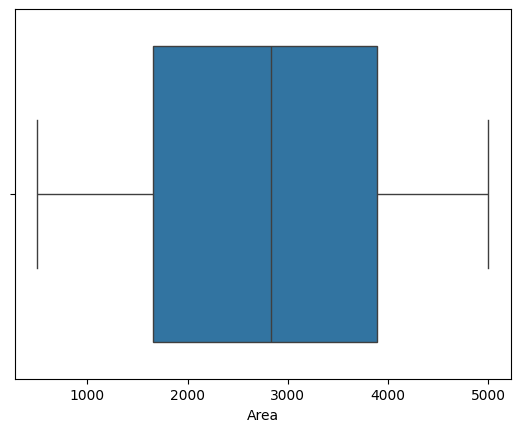

In [14]:
sns.boxplot(x=house['Area'])

<Axes: xlabel='Bedrooms'>

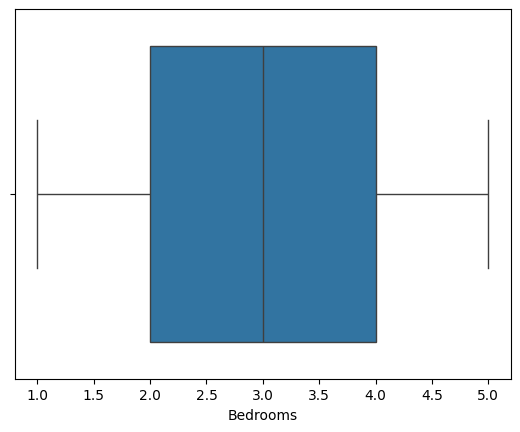

In [15]:
sns.boxplot(x=house['Bedrooms'])

<Axes: xlabel='Bathrooms'>

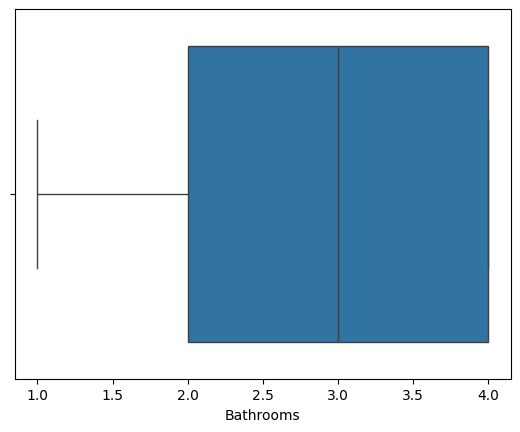

In [16]:
sns.boxplot(x=house['Bathrooms'])

<Axes: xlabel='Floors'>

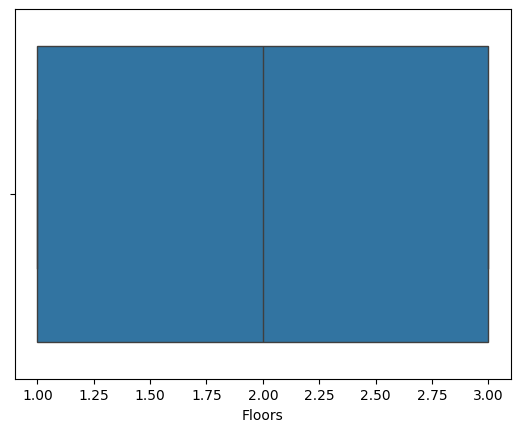

In [17]:
sns.boxplot(x=house['Floors'])

<Axes: xlabel='YearBuilt'>

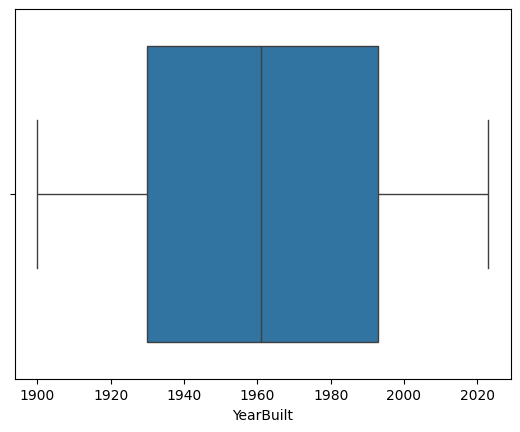

In [18]:
sns.boxplot(x=house['YearBuilt'])

<Axes: xlabel='Price'>

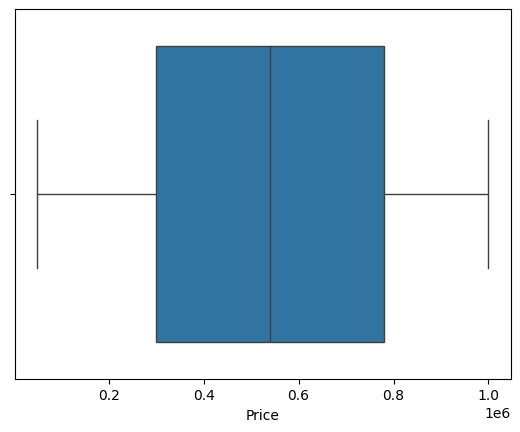

In [19]:

sns.boxplot(x=house['Price'])

In [30]:
numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
categorical_features = ['Location', 'Condition', 'Garage']

          jumlah sampel  persentase
Location                           
Downtown            558        27.9
Urban               485        24.2
Suburban            483        24.2
Rural               474        23.7


<Axes: title={'center': 'Location'}, xlabel='Location'>

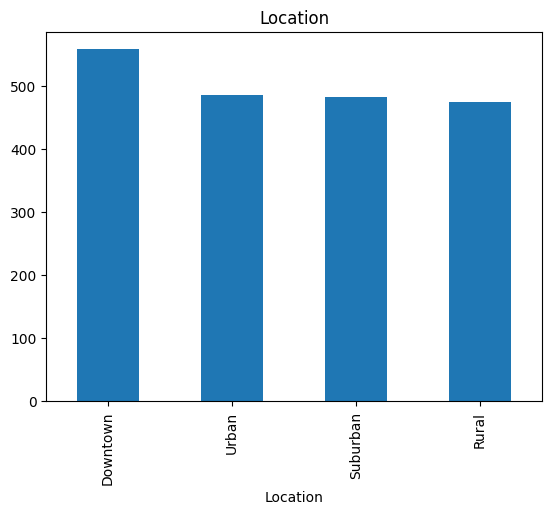

In [21]:
feature = categorical_features[0]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

           jumlah sampel  persentase
Condition                           
Fair                 521        26.0
Excellent            511        25.6
Poor                 507        25.4
Good                 461        23.0


<Axes: title={'center': 'Condition'}, xlabel='Condition'>

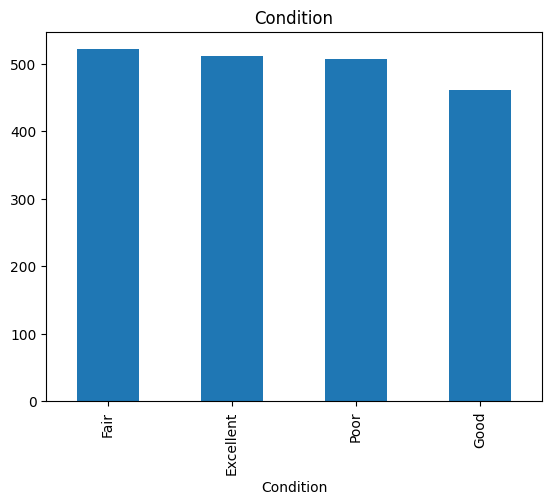

In [22]:
feature = categorical_features[1]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

        jumlah sampel  persentase
Garage                           
No               1038        51.9
Yes               962        48.1


<Axes: title={'center': 'Garage'}, xlabel='Garage'>

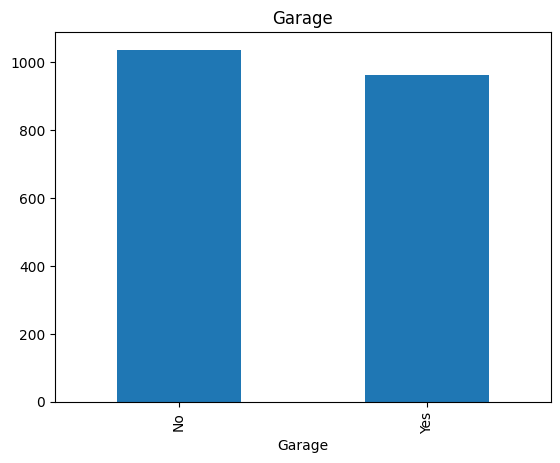

In [24]:
feature = categorical_features[2]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

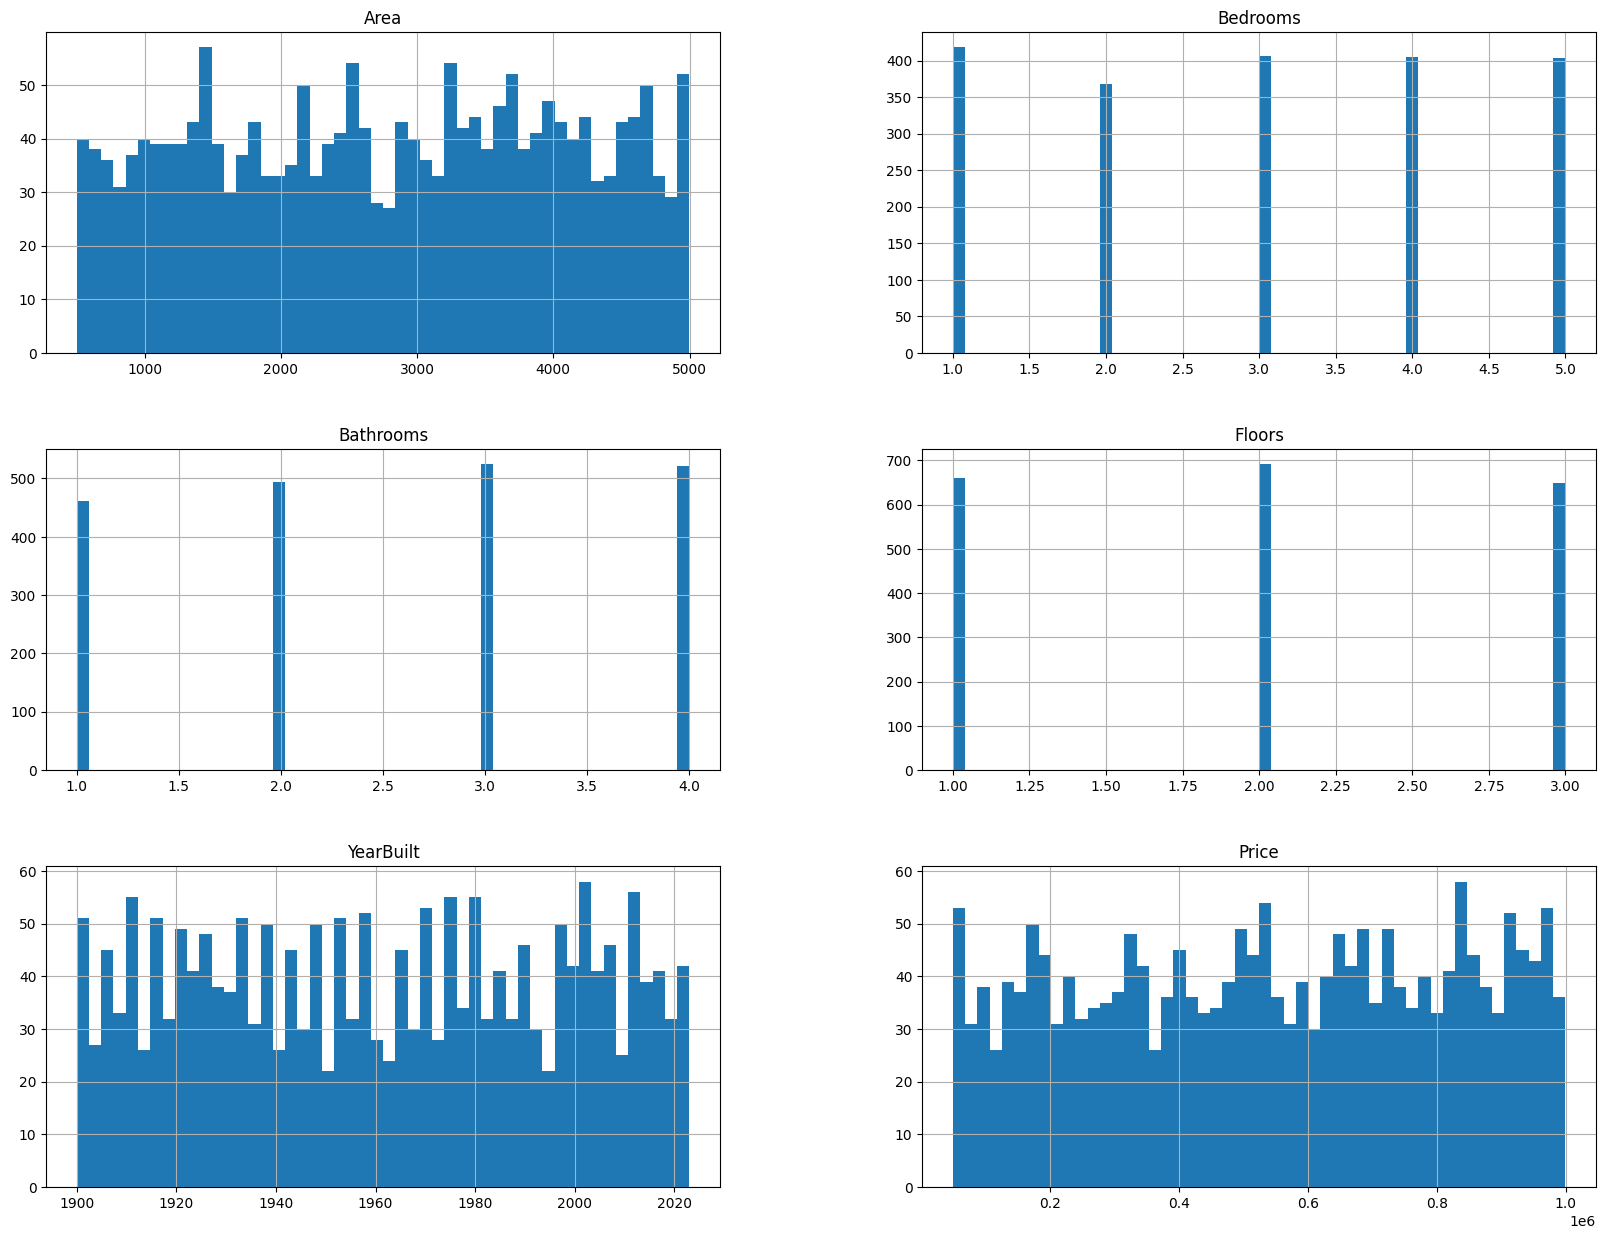

In [32]:
house.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18776\3725467163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Area", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
C:\Users\ACER\AppData\Local\Temp\ipykernel_18776\3725467163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Area", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
C:\Users\ACER\AppData\Local\Temp\ipykernel_18776\3725467163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Area", kind

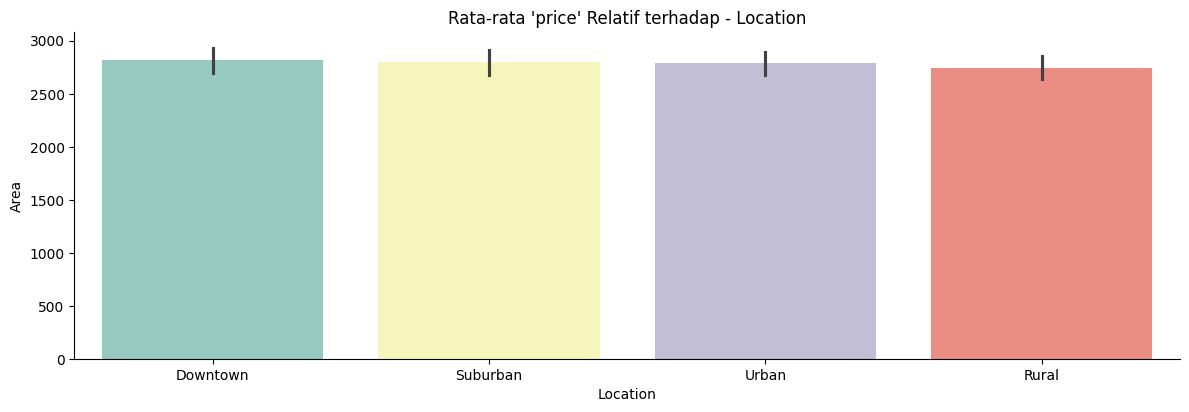

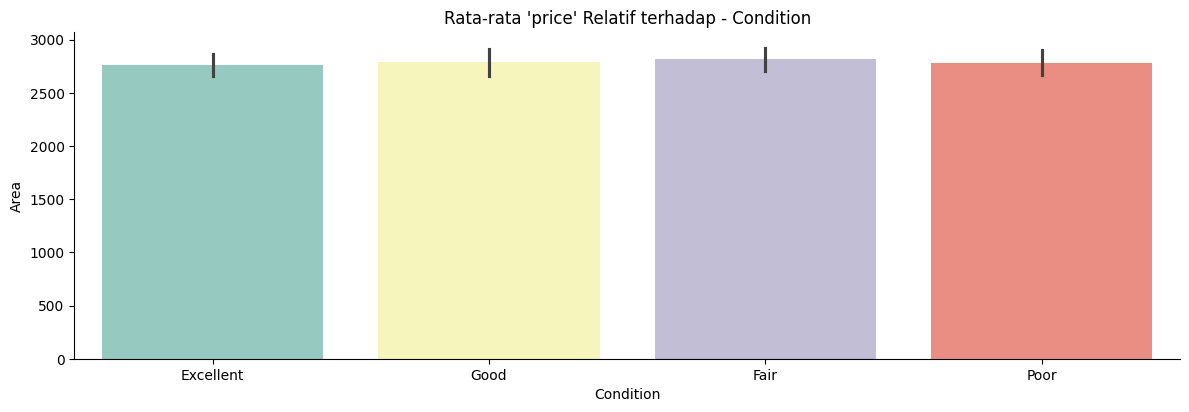

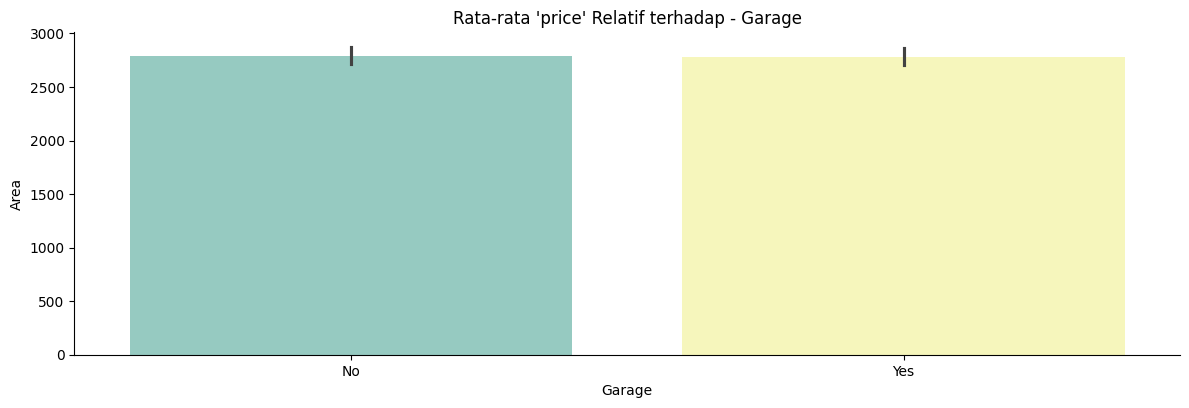

In [34]:
cat_features = house.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Area", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

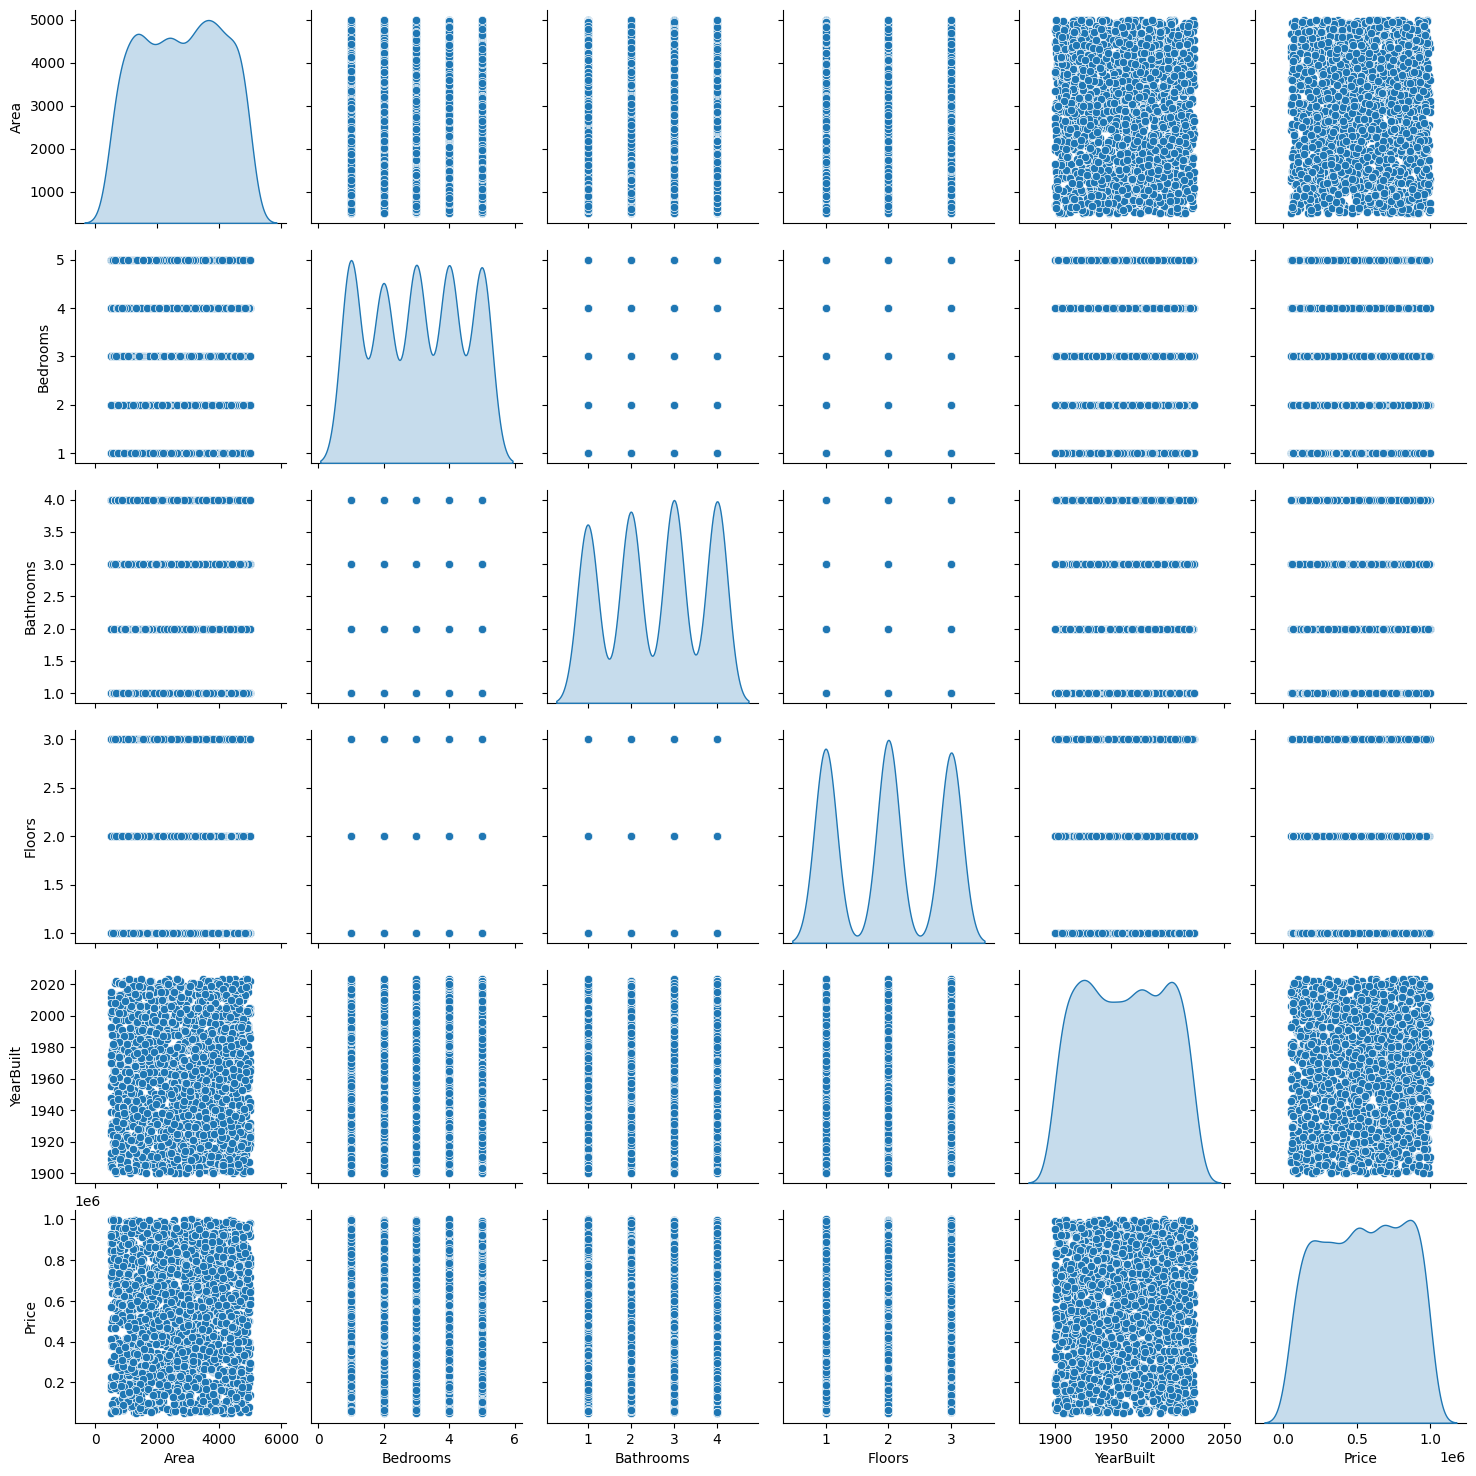

In [35]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(house, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

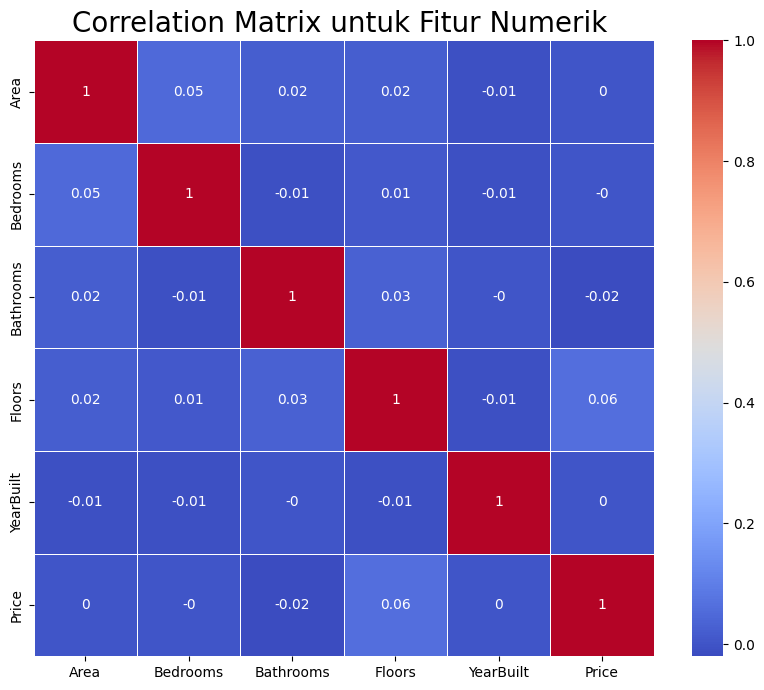

In [36]:
plt.figure(figsize=(10, 8))
correlation_matrix = house[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [37]:
from sklearn.preprocessing import  OneHotEncoder
house = pd.concat([house, pd.get_dummies(house['Location'], prefix='Location')],axis=1)
house = pd.concat([house, pd.get_dummies(house['Condition'], prefix='Condition')],axis=1)
house = pd.concat([house, pd.get_dummies(house['Garage'], prefix='Garage')],axis=1)
house.drop(['Location','Condition','Garage'], axis=1, inplace=True)
house.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
0,1360,5,4,3,1970,149919,True,False,False,False,True,False,False,False,True,False
1,4272,5,4,3,1958,424998,True,False,False,False,True,False,False,False,True,False
2,3592,2,2,3,1938,266746,True,False,False,False,False,False,True,False,True,False
3,966,4,2,2,1902,244020,False,False,True,False,False,True,False,False,False,True
4,4926,1,4,2,1975,636056,True,False,False,False,False,True,False,False,False,True


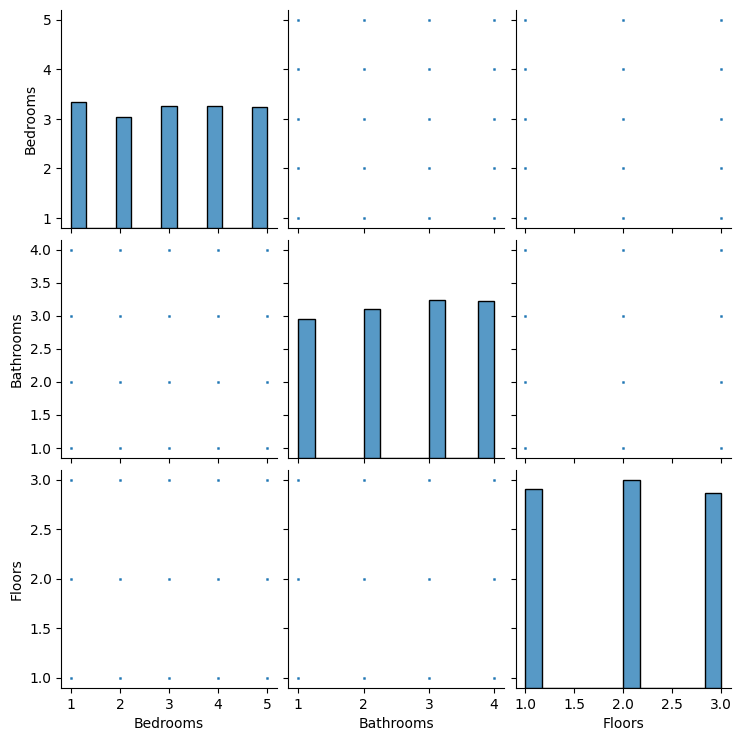

In [40]:
sns.pairplot(house[['Bedrooms','Bathrooms','Floors']], plot_kws={"s": 3})

In [41]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(house[['Bedrooms','Bathrooms','Floors']])
princ_comp = pca.transform(house[['Bedrooms','Bathrooms','Floors']])

In [42]:
pca.explained_variance_ratio_.round(3)

array([0.519, 0.314, 0.167])

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(house[['Bedrooms','Bathrooms','Floors']])
house['Area'] = pca.transform(house.loc[:, ('Bedrooms','Bathrooms','Floors')]).flatten()
house.drop(['Bedrooms','Bathrooms','Floors'], axis=1, inplace=True)

In [48]:
from sklearn.model_selection import train_test_split
 
X = house.drop(["Price"],axis =1)
y = house["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1800
Total # of sample in test dataset: 200


In [55]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['Area', 'YearBuilt', 'Location_Downtown', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Condition_Excellent',
       'Condition_Fair', 'Condition_Good', 'Condition_Poor', 'Garage_No',
       'Garage_Yes']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Area,YearBuilt,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
1137,0.684219,-1.482146,-0.628768,1.782227,-0.570507,-0.549107,-0.578206,-0.602166,-0.552534,1.734621,-1.035059,1.035059
1646,0.712327,0.599325,-0.628768,1.782227,-0.570507,-0.549107,-0.578206,1.660671,-0.552534,-0.576495,0.966129,-0.966129
301,-0.659898,-0.011240,-0.628768,-0.561096,1.752826,-0.549107,-0.578206,-0.602166,-0.552534,1.734621,0.966129,-0.966129
266,1.403215,0.627078,1.590412,-0.561096,-0.570507,-0.549107,1.729489,-0.602166,-0.552534,-0.576495,-1.035059,1.035059
1169,0.700661,-0.705064,-0.628768,-0.561096,1.752826,-0.549107,-0.578206,1.660671,-0.552534,-0.576495,0.966129,-0.966129


In [56]:
X_train[numerical_features].describe().round(4)

,Area,YearBuilt,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Garage_No,Garage_Yes
count,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000,1800.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003
min,-1.4234,-1.7042,-0.6288,-0.5611,-0.5705,-0.5491,-0.5782,-0.6022,-0.5525,-0.5765,-1.0351,-0.9661
25%,-0.7092,-0.8716,-0.6288,-0.5611,-0.5705,-0.5491,-0.5782,-0.6022,-0.5525,-0.5765,-1.0351,-0.9661
50%,0.0098,-0.0112,-0.6288,-0.5611,-0.5705,-0.5491,-0.5782,-0.6022,-0.5525,-0.5765,0.9661,-0.9661
75%,0.7288,0.8769,1.5904,-0.5611,-0.5705,-0.5491,1.7295,1.6607,-0.5525,-0.5765,0.9661,1.0351
max,1.4478,1.7094,1.5904,1.7822,1.7528,1.8211,1.7295,1.6607,1.8098,1.7346,0.9661,1.0351


In [57]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [59]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

In [60]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [61]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\Users\ACER\AppData\Local\Temp\ipykernel_18776\2961265077.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.56629894  0.7935956  -0.81607549  1.57067819  1.09887804 -1.34338153
  1.0156192   0.98786625 -1.14911088 -1.56540513 -1.39888743  0.04426595
  0.571572    0.7935956  -0.64955779  1.57067819  0.01651301  1.62618409
  1.43191344 -0.37202829  1.15438394  1.0711251   1.20988984  1.04337215
 -1.09360498 -1.31562858  1.59843114 -0.92708729  1.04337215 -1.42664038
 -0.06674584  1.37640754 -0.51079304 -0.92708729 -1.53765218 -1.09360498
  1.12663099 -1.62091103 -1.67641693 -1.17686383 -0.23326354 -1.39888743
 -0.06674584  1.04337215  0.0720189   0.2940425   0.0720189  -0.12225174
 -0.64955779  1.43191344 -1.26012268  1.32090164 -1.28787563  1.43191344
  0.21078365 -0.48304009 -0.34427534 -0.12225174 -0.39978124  0.65483085
  1.23764279 -0.53854599 -1.09360498 -1.31562858 -1.70416988 -0.89933434
 -1.48214628 

In [62]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,68427950.218025,78608018.195175
RF,17205492.559097,82208912.479786
Boosting,75091854.999492,75483398.289809


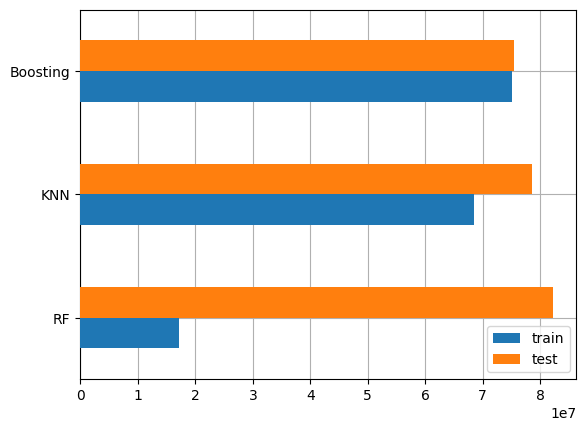

In [63]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [64]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1342,481613,518565.6,600042.9,499871.8
